<a href="https://colab.research.google.com/github/MuhammadUsman981/Portfolio-Projects/blob/main/Geo_Pandas_For_gis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and importing libraries

In [1]:
!pip install geopandas

# Once installed imporing other libraries

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Creating a geo dataframe from scratch
data = {
    "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
    "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
    "Longitude": [-58.66, -47.91, -70.66, -74.08, -66.86],
    "Latitude": [-34.58, -15.78, -33.45, 4.60, 10.48]
}

df = pd.DataFrame(data)
df

,City,Country,Longitude,Latitude
0,Buenos Aires,Argentina,-58.66,-34.58
1,Brasilia,Brazil,-47.91,-15.78
2,Santiago,Chile,-70.66,-33.45
3,Bogota,Colombia,-74.08,4.60
4,Caracas,Venezuela,-66.86,10.48


## Creating a geo data frame

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,City,Country,Longitude,Latitude,geometry
0,Buenos Aires,Argentina,-58.66,-34.58,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-47.91,-15.78,POINT (-47.91 -15.78)
2,Santiago,Chile,-70.66,-33.45,POINT (-70.66 -33.45)
3,Bogota,Colombia,-74.08,4.60,POINT (-74.08 4.6)
4,Caracas,Venezuela,-66.86,10.48,POINT (-66.86 10.48)


In [10]:
df['Latitude']

,Latitude
0,-34.58
1,-15.78
2,-33.45
3,4.60
4,10.48


## reading and writing Geo spatial data

In [12]:
pak = '/content/pak_admbnda_adm1_ocha_pco_gaul_20181218.shp'
gdf = gpd.read_file(pak)
gdf.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,41.407021,31.910371,Balochistan,PK7,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((69.87863 31.9602, 69.87382 31.94636,..."
1,1.659222,0.087285,Federal Capital Territory,PK5,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.19828 33.79771, 73.22183 33.79422..."
2,27.479368,9.901186,Khyber Pakhtunkhwa,PK2,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.65503 36.90857, 73.66257 36.89641..."
3,27.408452,19.362386,Punjab,PK6,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((69.55326 28.13298, 69.55127 28..."
4,30.150964,12.725140,Sindh,PK8,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((68.18577 23.83741, 68.19128 23..."


In [13]:
# Set the  BoroName as the index for easy refrence

gdf = gdf.set_index('ADM1_EN')
gdf.head()

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
ADM1_EN,,,,,,,,,,,,
Balochistan,41.407021,31.910371,PK7,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((69.87863 31.9602, 69.87382 31.94636,..."
Federal Capital Territory,1.659222,0.087285,PK5,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.19828 33.79771, 73.22183 33.79422..."
Khyber Pakhtunkhwa,27.479368,9.901186,PK2,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.65503 36.90857, 73.66257 36.89641..."
Punjab,27.408452,19.362386,PK6,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((69.55326 28.13298, 69.55127 28..."
Sindh,30.150964,12.725140,PK8,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((68.18577 23.83741, 68.19128 23..."


In [14]:
gdf['Area'] = gdf.area
gdf

<ipython-input-14-06d94edcde1d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['Area'] = gdf.area


,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Area
ADM1_EN,,,,,,,,,,,,,
Balochistan,41.407021,31.910371,PK7,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((69.87863 31.9602, 69.87382 31.94636,...",31.910371
Federal Capital Territory,1.659222,0.087285,PK5,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.19828 33.79771, 73.22183 33.79422...",0.087285
Khyber Pakhtunkhwa,27.479368,9.901186,PK2,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"POLYGON ((73.65503 36.90857, 73.66257 36.89641...",9.901186
Punjab,27.408452,19.362386,PK6,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((69.55326 28.13298, 69.55127 28...",19.362386
Sindh,30.150964,12.725140,PK8,None,None,None,Pakistan,PK,2018-11-30,2018-12-18,0000/00/00,"MULTIPOLYGON (((68.18577 23.83741, 68.19128 23...",12.725140


In [15]:
# Get the boundary of each polygon
gdf["boundary"] = gdf.boundary

# Get the centroid of each polygon
gdf["centroid"] = gdf.centroid

gdf[["boundary", "centroid"]]

<ipython-input-15-e180ac32bf41>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


,boundary,centroid
ADM1_EN,,
Balochistan,"LINESTRING (69.87863 31.9602, 69.87382 31.9463...",POINT (65.89306 28.32717)
Federal Capital Territory,"LINESTRING (73.19828 33.79771, 73.22183 33.794...",POINT (73.12347 33.67119)
Khyber Pakhtunkhwa,"LINESTRING (73.65503 36.90857, 73.66257 36.896...",POINT (71.65218 34.14066)
Punjab,"MULTILINESTRING ((69.55326 28.13298, 69.55127 ...",POINT (72.14054 30.81109)
Sindh,"MULTILINESTRING ((68.18577 23.83741, 68.19128 ...",POINT (68.77364 26.00971)


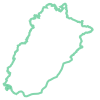

In [16]:
gdf.loc['Punjab','boundary']

In [17]:
# Use Punjab's centroid as the reference point
punjab_centroid = gdf.loc["Punjab", "centroid"]

# Calculate the distance from each centroid to Punjab's centroid
gdf["distance_to_punjab"] = gdf["centroid"].distance(punjab_centroid)
gdf[["centroid", "distance_to_punjab"]]

<ipython-input-17-20f786d1d459>:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance_to_punjab"] = gdf["centroid"].distance(punjab_centroid)


,centroid,distance_to_punjab
ADM1_EN,,
Balochistan,POINT (65.89306 28.32717),6.723158
Federal Capital Territory,POINT (73.12347 33.67119),3.024282
Khyber Pakhtunkhwa,POINT (71.65218 34.14066),3.365189
Punjab,POINT (72.14054 30.81109),0.000000
Sindh,POINT (68.77364 26.00971),5.864237


<ipython-input-19-e39c412be0fb>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf["ADM1_EN"]):


KeyError: 'ADM1_EN'

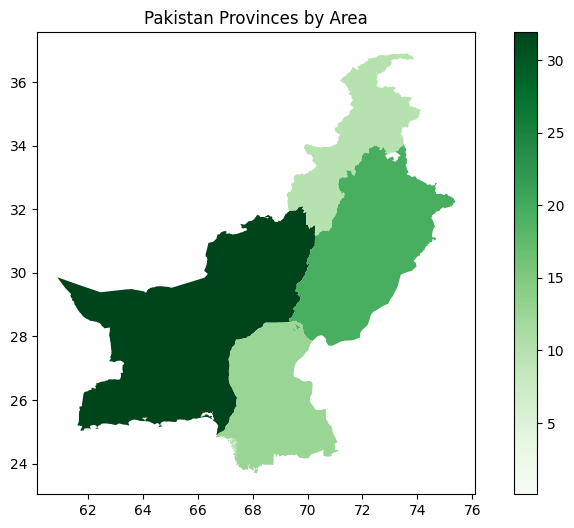

In [19]:
# # Plot the GeoDataFrame
# ax = gdf.plot("Area", legend=True, figsize=(10, 6), cmap="Greens")

# # Add a title
# plt.title("Pakistan Provinces by Area")

# # Add labels
# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf["ADM1_EN"]):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# plt.show()

<ipython-input-24-488be878bd14>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["buffered_centroid"] = gdf.centroid.buffer(0.5)
<ipython-input-24-488be878bd14>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["buffered_centroid"] = gdf.centroid.buffer(0.5)


<Axes: >

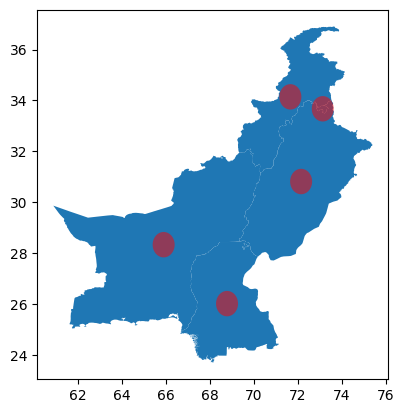

In [24]:
# Create a buffer around the centroids
gdf["buffered_centroid"] = gdf.centroid.buffer(0.5)

# Plot the original geometry and buffered centroids
ax = gdf.plot()
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=0.5)

In [32]:
# Calculate the nearest neighbor for each centroid
from scipy.spatial import KDTree

# Create a spatial index
tree = KDTree(gdf["centroid"].apply(lambda point: (point.x, point.y)).tolist())

# Find the nearest neighbor distances
gdf["nearest_neighbor_distance"],_ = gdf["nearest_neighbor_distance"] = tree.query(gdf["centroid"].apply(lambda point: (point.x, point.y)).tolist(), k=2)[0][:, 1]

ValueError: too many values to unpack (expected 2)

In [20]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.3 MB/s eta 0:00:00


In [23]:
gdf.explore("Area",legend=False, tiles = "CartoDB positron", style_kwds=dict(color="grey"))

<ipython-input-33-7d317e27a00b>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["buffered"] = gdf.buffer(1)


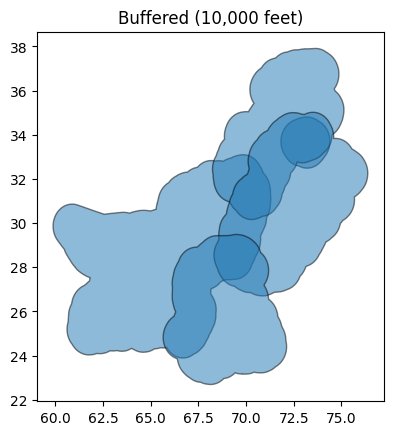

In [33]:
# Buffer the boroughs by 10,000 feet
gdf["buffered"] = gdf.buffer(1)

# Plot the buffered geometries
gdf["buffered"].plot(alpha=0.5, edgecolor="black")
plt.title("Buffered (10,000 feet)")
plt.show()